<a href="https://colab.research.google.com/github/DzhuJK/Chiselni-Metodi/blob/main/%D0%9B%D0%A03_%D0%9B%D0%B0%D1%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лац Варвара
Лабораторна робота №3
Варіант 9
Група 2-8

6x^4+4x^3-x^2-x-10=0

In [1]:
!pip install numdifftools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 2.0 MB/s eta 0:00:00


In [2]:
#відокремлення коренів
import numpy as np

def f(x):
    return 6 * x**4 + 4 * x**3 - x**2 - x - 10

def find_segments():
    search_range = np.arange(-10, 4, 1)
    segments = []

    for i in range(1, len(search_range)):
        x_prev = search_range[i - 1]
        x_curr = search_range[i]
        if f(x_prev) * f(x_curr) < 0:
            segments.append((x_prev, x_curr))

    return segments

segments = find_segments()
for segment in segments:
    print(f'Found segment: {segment}')

Found segment: (-2, -1)
Found segment: (1, 2)


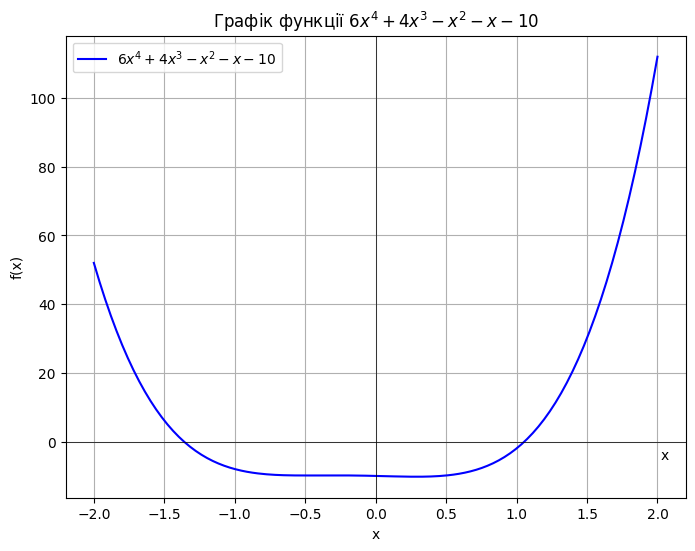

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 6 * x**4 + 4 * x**3 - x**2 - x - 10

# Генерація значень x і y
x = np.linspace(-2, 2, 200)
y = f(x)

# Побудова графіка
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$6x^4 + 4x^3 - x^2 - x - 10$', color='blue')
plt.title('Графік функції $6x^4 + 4x^3 - x^2 - x - 10$')
plt.xlabel('x')
plt.ylabel('f(x)')

# Додавання осей із стрілками
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Додавання підписів осей
plt.annotate('x', xy=(2.05, -4), ha='center', va='center')
plt.annotate('y', xy=(-0.3, 190), ha='center', va='center')

plt.grid(True)
plt.legend()
plt.show()

In [11]:
import numpy as np
import numdifftools as nd

def f(x):
    return 6 * x**4 + 4 * x**3 - x**2 - x - 10  # функція

def newton_method(a, b, eps, f):
    xi = b if f(b) * nd.Derivative(f, n=2)(b) > 0 else a
    while True:
        xi_1 = xi - f(xi) / nd.Derivative(f)(xi)
        if abs(xi_1 - xi) <= eps:
            break
        xi = xi_1
    print('Метод Ньютона, x =', round(xi_1, 4))

def combined_method(a, b, eps, f):
    a0, b0 = (a, b) if f(a) * nd.Derivative(f, n=2)(a) > 0 else (b, a)
    ai, bi = a0, b0
    while True:
        ai_1 = ai - f(ai) * (bi - ai) / (f(bi) - f(ai))
        bi_1 = bi - f(bi) / nd.Derivative(f)(bi)
        if abs(ai_1 - bi_1) <= eps:
            break
        ai, bi = ai_1, bi_1
    print('Комбінований метод, x =', round((ai_1 + bi_1) / 2, 4))

if __name__ == "__main__":
    intervals = [(-2, -1), (1, 2)]
    eps = 0.001

    for a, b in intervals:
        print(f"Розв'язання на відрізку [{a}, {b}]")
        newton_method(a, b, eps, f)
        combined_method(a, b, eps, f)
        print()


Розв'язання на відрізку [-2, -1]
Метод Ньютона, x = -1.3607
Комбінований метод, x = -1.3607

Розв'язання на відрізку [1, 2]
Метод Ньютона, x = 1.056
Комбінований метод, x = 1.0559

